<a href="https://colab.research.google.com/github/caiobmbr/datascience-projects/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo"  width="80%" src="https://raw.githubusercontent.com/caiobmbr/datascience-projects/master/banner_v1.0.png">

**Data Science na Prática 2.0.**
*by [Caio Melo](https://github.com/caiobmbr/datascience-projects)*

## Analisando a Violência no Rio de Janeiro
---

O Brasil é conhecido por ser um país que enfrenta diariamente a questão da segurança pública e o Rio de Janeiro é um caso especial nesse sentido. O nível alarmante de casos de roubo, furtos e atendados à vida é sempre evidenciado nos noticiários.

<img alt="Rio de Janeiro landscape" width="80%" src="https://images.unsplash.com/photo-1552428386-840770ff7588?ixlib=rb-1.2.1&auto=format&fit=crop&w=1953&q=80">

Atualmente, as leis de acesso à informação e a conscientização dos órgãos públicos, vêm proporcionando a disponibilização de várias fontes de dados.

Como exemplo, o governo do Rio de Janeiro traz a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/estatistica.html). 

Neste notebook, faremos uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.



## Obtenção dos Dados

Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro. O arquivo `csv` utilizado nessa análise foi pré-processado pelo professor Carlos Melo, com intuito de focar nos pontos de interesse da análise e que pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.



In [35]:
# importação das bibliotecas para uso na análise
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# importando a base de dados
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados. 

O diciónario de variáveis não foi encontrado em sua totalidade no site do portal ISPDados portanto segue abaixo apenas a descrição dos nomes das colunas (variáveis) do dataset, junto com o tipo de dado para cada variável. A maioria das variáveis apresenta dados quantitativos das mais diversas situações de violências que foram contabilizadas.

Apenas as colunas vano e mes representam dados não númericos pois representam um marco temporal. Todos as outras variáveis representam quantidade de ocorrências de violência


In [39]:
# mostrar os nomes e tipos de dados das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

### Apresentação do dataframe

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataframe, analisando as 5 primeiras entradas

In [38]:
# mostrar as cinco primeiras entradas do dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Tamanho do dataframe e valores ausentes

O formato do dataframe apresenta diversos valores ausentes devido à forma como que o mesmo foi preenchido ou em que começaram a ser registrados certo tipo de ocorrências. Por exemplo, variáveis relacionadas à bicicletas possuem o mesmo padrão de ausência de valores. 

Entradas:	344
Variáveis:	56

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279

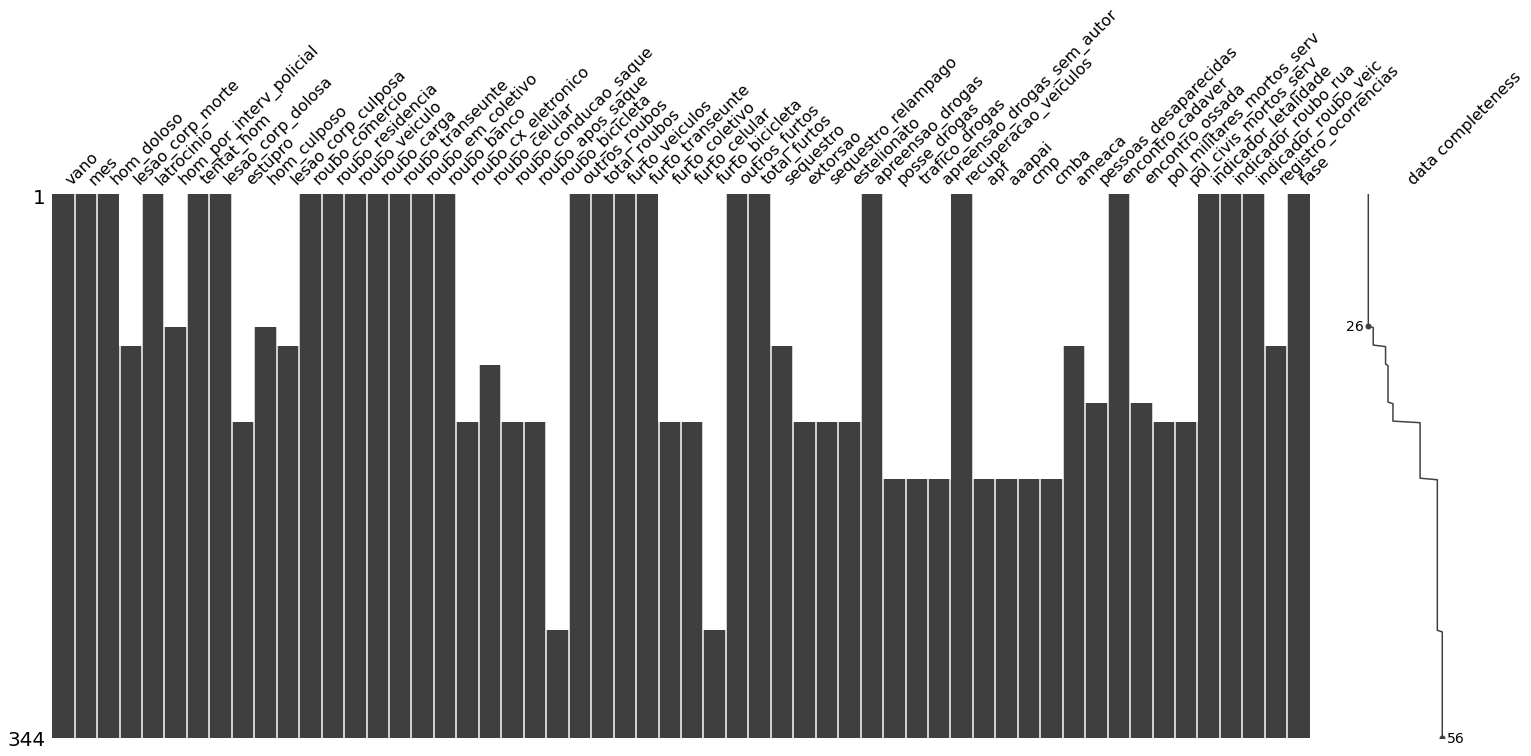

In [40]:
# mostrando o tamanho do dataframe
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

# encontrando percentual de valores ausentes
print((df.isnull().sum()/len(df)).sort_values(ascending=False))

msno.matrix(df,labels=True)
plt.show()

## Exploração estatística dos dados

Para essa parte da análise, visto o perfil do dataframe disponível, iremos nos ater basicamente a três variáveis: `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`. Portanto, iremos utilizar o método `describe()` para nos situar de uma forma geral sobre essas três variáveis, pois nosso foco nesta parte será analisarmos o percentual de recuperação de veículos, que se dá pela seguinte fórmula:

> $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$


In [62]:
df[['vano','roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].describe()

,vano,roubo_veiculo,furto_veiculos,recuperacao_veiculos
count,344.000000,344.000000,344.000000,344.000000
mean,2004.837209,2448.697674,1674.671512,1772.238372
std,8.289036,789.689559,294.852020,656.761843
min,1991.000000,1097.000000,1159.000000,729.000000
25%,1998.000000,1889.750000,1430.500000,1276.750000
50%,2005.000000,2322.000000,1637.500000,1755.000000
75%,2012.000000,2778.000000,1833.250000,2202.000000
max,2019.000000,5358.000000,2630.000000,3695.000000


Podemos perceber que considerando todas as entradas entre os anos de 1991 e 2019, na média a recuperação de veículos estaria entre 42,98% dividindo-se a média de `recuperacao_veiculos` pela soma das médias de `roubo_veiculo` com `furto_veiculo`. 

Contudo, uma outra análise pertinenten seria avaliar como o percentual de recuperação de veículos vem se desenvolvendo ao longo dos anos no Rio de Janeiro

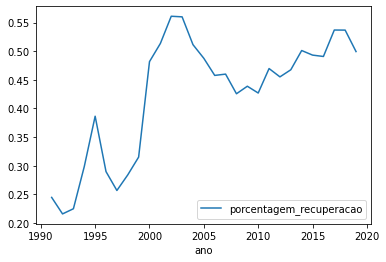

,ano,roubo_veiculo_media,furto_veiculos_media,recuperacao_veiculos_media,porcentagem_recuperacao
0,1991,1371.000000,1998.250000,824.166667,0.244614
1,1992,2041.833333,2301.583333,937.166667,0.215767
2,1993,2065.833333,2241.416667,968.250000,0.224795
3,1994,2289.166667,2185.916667,1335.833333,0.298505
4,1995,1973.000000,1827.333333,1468.500000,0.386413


In [75]:
# cálculo das médias das variáveis por ano
df_roubo_veiculo = df.groupby(by=['vano']).roubo_veiculo.mean()
df_furto_veiculos = df.groupby(by=['vano']).furto_veiculos.mean()
df_recuperacao_veiculos = df.groupby(by=['vano']).recuperacao_veiculos.mean()

# construção do dataframe auxiliar das médias
df_veiculos = pd.concat([df_roubo_veiculo, df_furto_veiculos, df_recuperacao_veiculos], axis=1).reset_index()
df_veiculos.columns = ['ano','roubo_veiculo_media', 'furto_veiculos_media', 'recuperacao_veiculos_media']
df_veiculos['porcentagem_recuperacao'] = df_veiculos.recuperacao_veiculos_media / (df_veiculos.roubo_veiculo_media + df_veiculos.furto_veiculos_media)

# apresentando novo dataframe de roubo, furto e recuperacao de veículos
df_veiculos.plot(x='ano',y='porcentagem_recuperacao')
plt.show()
df_veiculos.head()

Comentar sobre o gráfico

## Visualização de Dados

Breve contextualização...

Plote e comente os seguintes gráficos:

* Histograma de `hom_doloso`
* Gráfico de linhas para a variável `roubo_em_coletivo`


## Conclusão

Escreva suas conclusões e análises sobre os indicadores de violência do Rio de Janeiro...